In [17]:
import json
import pandas as pd
import numpy as np
import os
import csv

#maybe doc import
with open(r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json", "r", encoding="utf-8") as file:
    data = json.load(file)

blueTimestamps = {}
redTimestamps = {}
participantData = []
participantsData = data['metadata']['participants']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The closest distance from (4000, 1000) to the line y = x - 2373 is 443.36 units.
The coordinates of the closest intersection point are (3686.5, 1313.5).


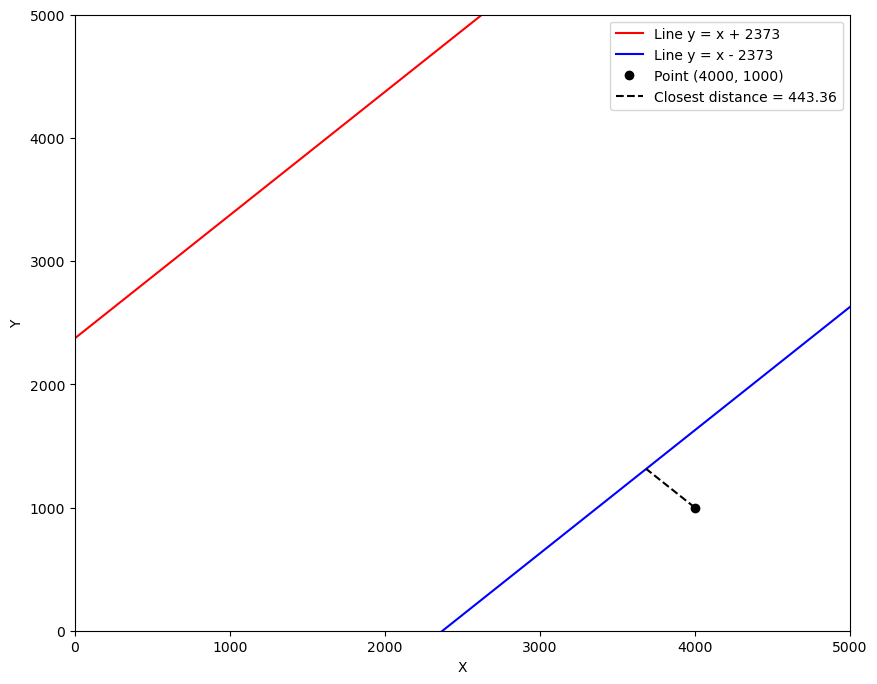

In [21]:
%run fetchTurretInfo.ipynb
%run sectionFunctions.ipynb

In [16]:
def findClosestCaseNumber(blueTimestamps, redTimestamps, participantId, eventTimestamp):
    # Determine which timestamps dictionary to use based on participantId
    timestamps = blueTimestamps if participantId > 0 and participantId < 6 else redTimestamps
    
    closestCaseNumber = None
    smallestDifference = float('inf')
    
    for caseNumber, timestamp in timestamps.items():
        difference = abs(timestamp - eventTimestamp)
        if difference < smallestDifference:
            smallestDifference = difference
            closestCaseNumber = caseNumber
    
    return closestCaseNumber

In [4]:
def executeClosestCaseFunction(blueTimestamps, redTimestamps, participantId, eventTimestamp, x, y):
    # Use the modified findClosestCaseNumber function
    closestCaseNumber = findClosestCaseNumber(blueTimestamps, redTimestamps, participantId, eventTimestamp)
    
    # Determine the function name prefix based on participantId
    functionPrefix = "blueCase" if participantId > 0 and participantId < 6 else "redCase"
    
    # Construct the function name
    functionName = f"{functionPrefix}{closestCaseNumber}"
    
    # Retrieve the function object using globals() or locals() if the function is defined in a local scope
    functionToCall = globals().get(functionName)
    
    # Check if the function exists
    if functionToCall:
        # Print the name of the function being called
        print(f"Calling function: {functionName}")
        
        # Call the function with x and y, and return its result
        return functionToCall(x, y)
    else:
        return "Function does not exist."

In [5]:
def getTowerDestroyedData(data, participantData):
    towerData = []
    caseBlue = 0
    caseRed = 0
    resetTowerData()
    # Initialize boolean variables for blue team
    bto = bti = bmo = bmi = bbo = bbi = True

    # Initialize boolean variables for red team
    rto = rti = rmo = rmi = rbo = rbi = True
    
    for frame in data['info']['frames']:
        for event in frame.get('events', []):
            if event['type'] == 'BUILDING_KILL':
                teamId = event['teamId']
                towerType = event.get('towerType', None)
                laneType = event['laneType']
                timestamp = event['timestamp']
                
                # Update boolean variables based on tower destruction events
                if towerType in ['OUTER_TURRET', 'INNER_TURRET']:
                    if teamId == 100:
                        if towerType == 'OUTER_TURRET':
                            if laneType == 'TOP_LANE':
                                bto = False  # blue top outer destroyed
                            elif laneType == 'MID_LANE':
                                bmo = False  # blue mid outer destroyed
                            elif laneType == 'BOT_LANE':
                                bbo = False  # blue bot outer destroyed
                        elif towerType == 'INNER_TURRET':
                            if laneType == 'TOP_LANE':
                                bti = False  # blue top inner destroyed
                            elif laneType == 'MID_LANE':
                                bmi = False  # blue mid inner destroyed
                            elif laneType == 'BOT_LANE':
                                bbi = False  # blue bot inner destroyed
                        # Call blueDefCaseCalc with updated boolean variables
                        caseBlue = blueDefCaseCalc(bto, bti, bmo, bmi, bbo, bbi)
                        # Update blue team timestamps
                        updateBlueTowerData(caseBlue, timestamp)
                    elif teamId == 200:
                        if towerType == 'OUTER_TURRET':
                            if laneType == 'TOP_LANE':
                                rto = False  # red top outer destroyed
                            elif laneType == 'MID_LANE':
                                rmo = False  # red mid outer destroyed
                            elif laneType == 'BOT_LANE':
                                rbo = False  # red bot outer destroyed
                        elif towerType == 'INNER_TURRET':
                            if laneType == 'TOP_LANE':
                                rti = False  # red top inner destroyed
                            elif laneType == 'MID_LANE':
                                rmi = False  # red mid inner destroyed
                            elif laneType == 'BOT_LANE':
                                rbi = False  # red bot inner destroyed
                        # Call redDefCaseCalc with updated boolean variables
                        caseRed = redDefCaseCalc(rto, rti, rmo, rmi, rbo, rbi)
                        # Update red team timestamps
                        updateRedTowerData(caseRed, timestamp)

                # Append tower data to the list
                towerData.append({
                    'teamId': teamId,
                    'towerType': towerType,
                    'laneType': laneType,
                    'timestamp': timestamp
                })

    return towerData

# Example usage:
towerData = getTowerDestroyedData(data, participantData)

# Display the extracted data
for tower in towerData:
    teamId = tower['teamId']
    towerType = tower['towerType']
    laneType = tower['laneType']
    timestamp = tower['timestamp']

    if towerType in ['OUTER_TURRET', 'INNER_TURRET']:
        print(f"Team: {teamId}, Tower Type: {towerType}, Lane: {laneType}, timestamp {timestamp}")
        
print("\nBlue Team Timestamps:")
for caseNumber, timestamp in blueTimestamps.items():
    print(f"Case Number: {caseNumber}, Timestamp: {timestamp}")

# Print contents of redTimestamps dictionary
print("\nRed Team Timestamps:")
for caseNumber, timestamp in redTimestamps.items():
    print(f"Case Number: {caseNumber}, Timestamp: {timestamp}")

Team: 100, Tower Type: OUTER_TURRET, Lane: MID_LANE, timestamp 849135
Team: 200, Tower Type: OUTER_TURRET, Lane: BOT_LANE, timestamp 914467
Team: 100, Tower Type: OUTER_TURRET, Lane: TOP_LANE, timestamp 918861
Team: 100, Tower Type: OUTER_TURRET, Lane: BOT_LANE, timestamp 1038912
Team: 100, Tower Type: INNER_TURRET, Lane: BOT_LANE, timestamp 1268479
Team: 100, Tower Type: INNER_TURRET, Lane: MID_LANE, timestamp 1377708
Team: 100, Tower Type: INNER_TURRET, Lane: TOP_LANE, timestamp 1563215

Blue Team Timestamps:
Case Number: 1, Timestamp: 0
Case Number: 4, Timestamp: 849135
Case Number: 10, Timestamp: 918861
Case Number: 12, Timestamp: 1038912
Case Number: 21, Timestamp: 1268479
Case Number: 26, Timestamp: 1377708
Case Number: 2, Timestamp: 1563215

Red Team Timestamps:
Case Number: 1, Timestamp: 0
Case Number: 7, Timestamp: 914467


In [6]:
def processParticipantFramesToCsv(filePath, outputCsvPath, blueTimestamps, redTimestamps):
    # Load JSON data
    with open(filePath, 'r') as file:
        data = json.load(file)

    # Define CSV headers
    headers = ['frameNumber', 'participantId', 'x', 'y', 'totalGold', 'totalDamageToChampions', 'safetyStatus']

    # Prepare for CSV writing
    os.makedirs(os.path.dirname(outputCsvPath), exist_ok=True)
    with open(outputCsvPath, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        writer.writeheader()

        # Iterate through frames
        for frameIndex, frame in enumerate(data['info']['frames']):
            timestamp = frame['timestamp']  # Frame's timestamp
            for participantId, details in frame['participantFrames'].items():
                position = details.get('position', {'x': 0, 'y': 0})
                totalGold = details.get('totalGold', 0)
                # Assuming 'totalDamageToChampions' is available in the participantFrames details
                totalDamageToChampions = details.get('totalDamageToChampions', 0)

                # Calculate safety status for each participant in this frame
                safetyStatus = executeClosestCaseFunction(blueTimestamps, redTimestamps, int(participantId), timestamp, position['x'], position['y'])

                writer.writerow({
                    'frameNumber': frameIndex + 1,
                    'participantId': participantId,
                    'x': position['x'],
                    'y': position['y'],
                    'totalGold': totalGold,
                    'totalDamageToChampions': totalDamageToChampions,
                    'safetyStatus': safetyStatus
                })

In [7]:
inputFilePath = r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
outputCsvPath = r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
processParticipantFramesToCsv(inputFilePath, outputCsvPath, blueTimestamps, redTimestamps)

Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: redCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 0
Calling function: blueCase1
Safe , threat = 

In [8]:
file_path = r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
df = pd.read_csv(file_path)

# Filter the DataFrame to keep only rows where the participant ID is 3 or 8
# Adjust 'participant_id' to the actual column name in your CSV file that contains the participant IDs
filtered_df = df[df['participantId'].isin([3, 8])]

# Save the filtered DataFrame to a new CSV file
filtered_file_path = r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
filtered_df.to_csv(filtered_file_path, index=False)

print('Filtered CSV file has been saved.')

Filtered CSV file has been saved.


In [9]:

file_path = r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
df = pd.read_csv(file_path)

# Calculate the progressive average threat
# This groups the DataFrame by 'participantId', then applies the expanding mean on 'safetyStatus' within each group
df['progressive_average_threat'] = df.groupby('participantId')['safetyStatus'].expanding().mean().reset_index(level=0, drop=True)

# Save the modified DataFrame back to a CSV file
output_path =r"E:\DistanceTesting\filenamesv2\EUW1_6863954134.json"
df.to_csv(output_path, index=False)

print(f"Modified file saved to {output_path}")


Modified file saved to E:\DistanceTesting\filenamesv2\EUW1_6863954134.json


In [12]:
df = pd.read_csv(file_path)
df.tail(10)

,frameNumber,participantId,x,y,totalGold,totalDamageToChampions,safetyStatus,progressive_average_threat
54,28,3,394,462,5296,0,0,17.857143
55,28,8,1533,5469,13109,0,100,53.571429
56,29,3,394,462,5418,0,0,17.241379
57,29,8,14340,14391,13483,0,0,51.724138
58,30,3,394,462,5541,0,0,16.666667
59,30,8,2287,3335,13943,0,100,53.333333
60,31,3,394,462,5664,0,0,16.129032
61,31,8,1976,2051,14256,0,100,54.838710
62,32,3,394,462,5671,0,0,15.625000
63,32,8,1976,2051,14263,0,100,56.250000
